# Liver Cirhosis Risk Prediction/Classification

In [573]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, mean_squared_error, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Data Preprocessing

In [526]:
#Load
cir_df = pd.read_csv("cirrhosis.csv")

In [527]:
cir_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [528]:
cir_df.shape

(418, 20)

In [529]:
cir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [530]:
cir_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [531]:
cir_df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [532]:
cir_df[cir_df["Drug"].isna()].head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN


In [533]:
# Drop rows with too many null values, as well as ID column
cir_df = cir_df[cir_df["Drug"].isna() == False]
cir_df.drop(columns= ['ID'], inplace= True)

cir_df.isna().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [534]:
#Impute numerical null values with median
cir_df["Cholesterol"].fillna(cir_df["Cholesterol"].median(), inplace=True)
cir_df["Tryglicerides"].fillna(cir_df["Tryglicerides"].median(), inplace=True)
cir_df["Platelets"].fillna(cir_df["Platelets"].median(), inplace=True)
cir_df["Copper"].fillna(cir_df["Copper"].median(), inplace=True)
cir_df["Age"] = (cir_df["Age"]/365)
cir_df["Age"] = cir_df["Age"].astype("int64")

cir_df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

/var/folders/fl/xmsqt32x4rd9htc3rkc5wd0m0000gp/T/ipykernel_33575/3080738137.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cir_df.corr(), annot = True, cmap='RdBu', ax=ax)


Text(0.5, 1.0, 'Correlation Matrix')

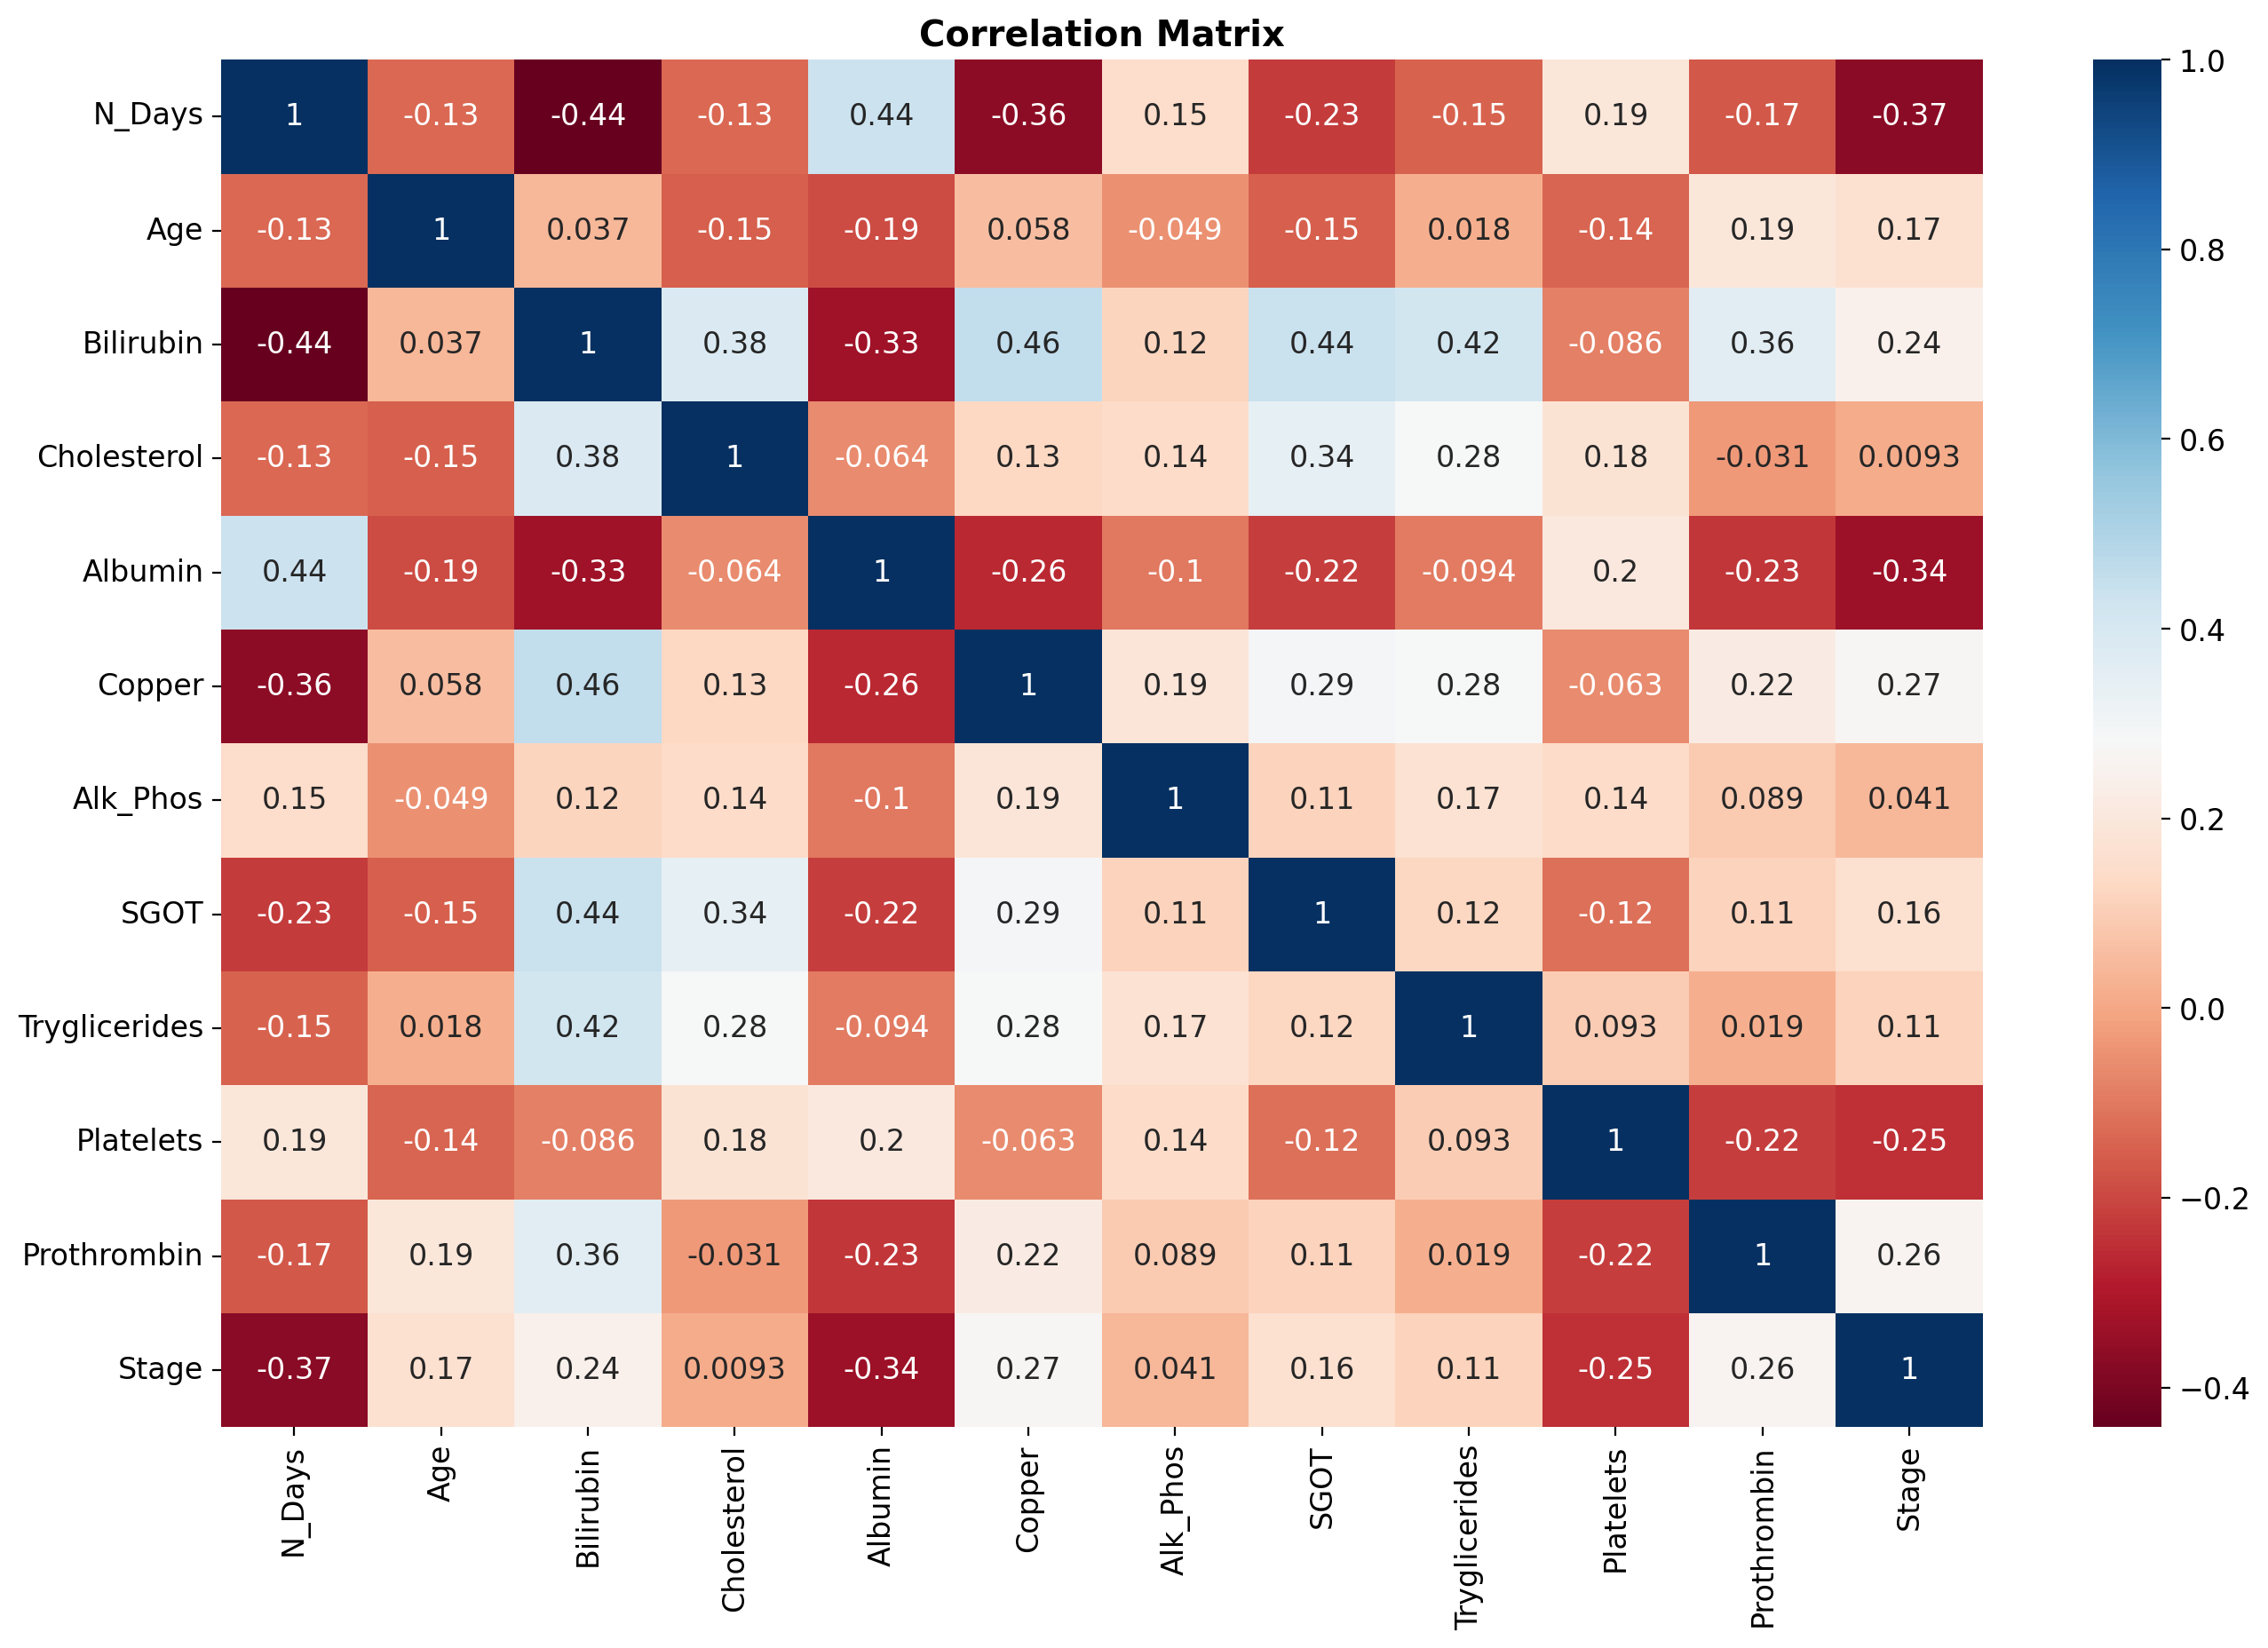

In [535]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(cir_df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')

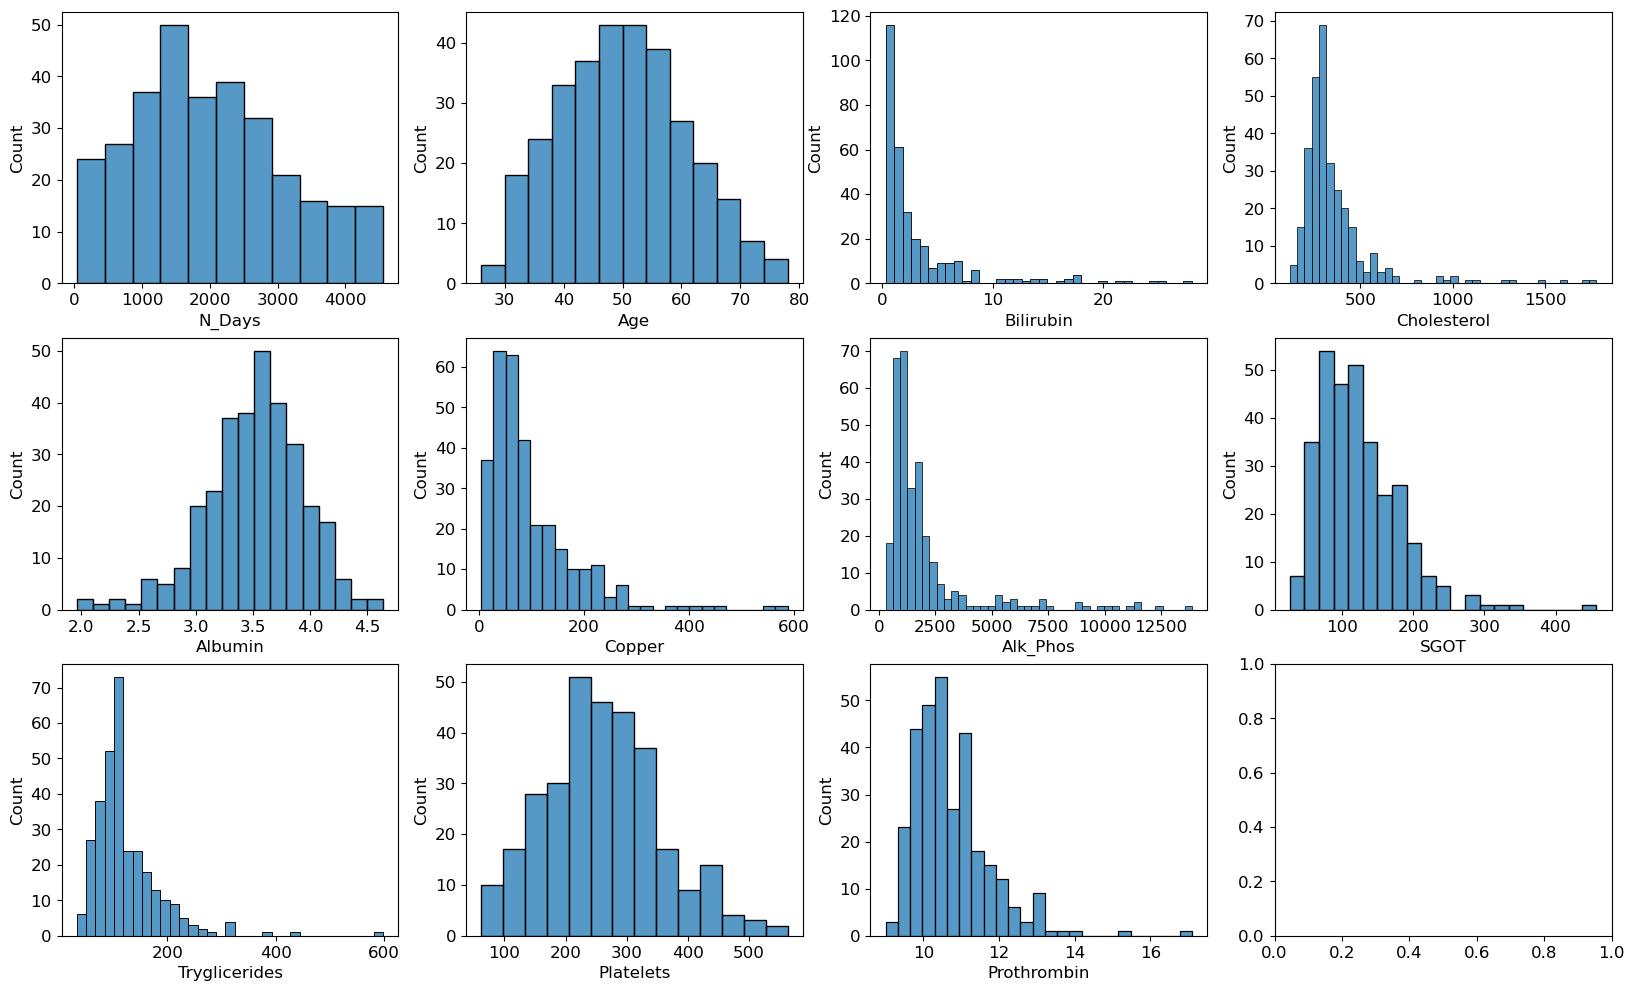

In [536]:
fig, ax = plt.subplots(3, 4, figsize = (20,12))
var = [['N_Days','Age','Bilirubin','Cholesterol'],
       ['Albumin','Copper','Alk_Phos','SGOT'],
       ['Tryglicerides','Platelets','Prothrombin']]
for x in range(3):
    for y in range(4):
        if x == 2 and y == 3:
            break
        else:
            sns.histplot(ax=ax[x,y],x = var[x][y], data = cir_df)

In [537]:
import copy

In [538]:
df = copy.deepcopy(cir_df)

In [539]:
# Dummy variables for categorical values
cir_df['Drug'].replace(['D-penicillamine','Placebo'], [1,0], inplace = True)
cir_df['Sex'].replace(['F','M'], [1,0], inplace = True)
cir_df['Ascites'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Hepatomegaly'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Spiders'].replace(['Y','N'], [1,0], inplace = True)
cir_df['Edema'].replace(['Y','N','S'], [1,0,-1], inplace = True)
cir_df['Status'].replace(['D','C','CL'], [1,0,-1], inplace = True)
out_df = copy.deepcopy(cir_df)
cir_df['Stage'].replace([1,2,3,4], [0,0,0,1], inplace = True) # make binary outcomes
out_df['Stage'].replace([1,2,3,4], ['S1','S2','S3','S4'], inplace = True)

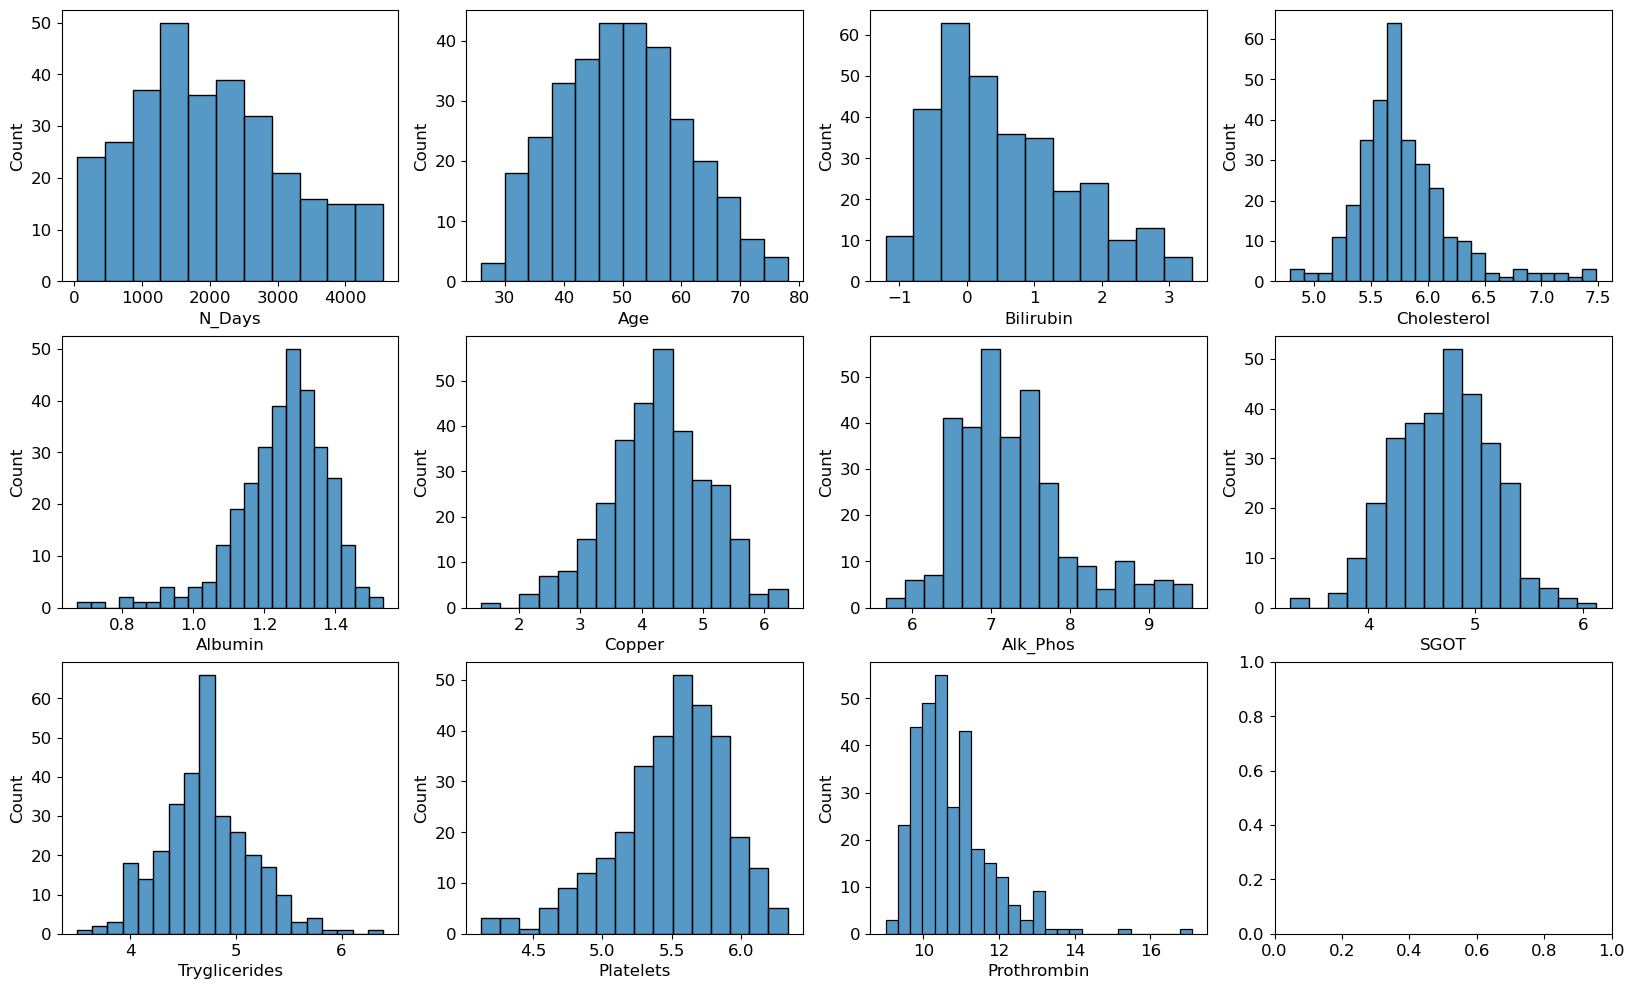

In [540]:
log_df = copy.deepcopy(cir_df)
log_df.iloc[:,9:17] = np.log(log_df.iloc[:,9:17])

fig, ax = plt.subplots(3, 4, figsize = (20,12))
var = [['N_Days','Age','Bilirubin','Cholesterol'],
       ['Albumin','Copper','Alk_Phos','SGOT'],
       ['Tryglicerides','Platelets','Prothrombin']]
for x in range(3):
    for y in range(4):
        if x == 2 and y == 3:
            break
        else:
            sns.histplot(ax=ax[x,y],x = var[x][y], data = log_df)

#### Distribution of variables based on whether have cirrhosis

Looking at the distribution of the numerical features, `Bilirubin`, `Age`, `Prothrombin`, `Copper` are suspected to be positively related to the risk of liver cirrhosis.

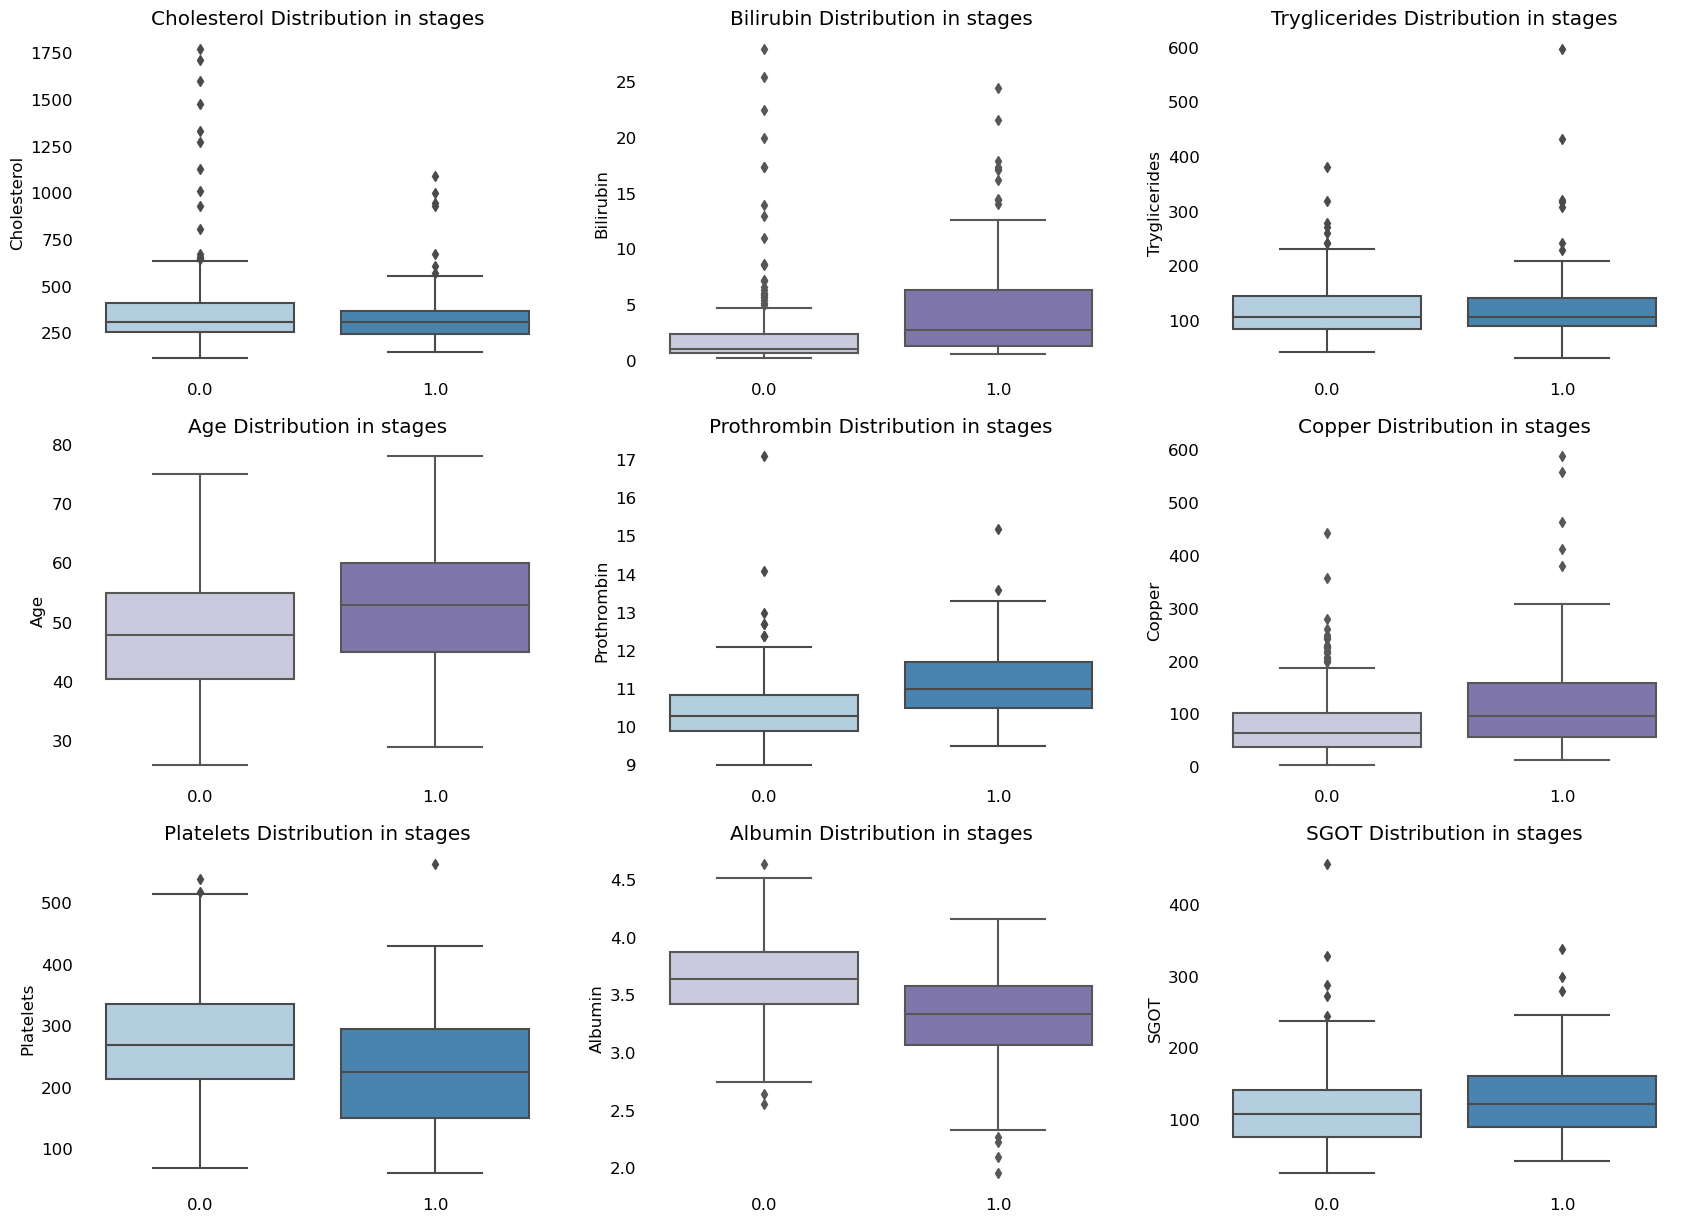

In [541]:
plt.figure(figsize=(20.6,15))
col = ['Cholesterol','Bilirubin','Tryglicerides','Age','Prothrombin','Copper',
       'Platelets','Albumin','SGOT']

for i in range(len(col)):
    var = col[i]
    if i%2 == 0:
        color = 'Blues'
    else:
        color = 'Purples'
    plt.subplot(3,3,i+1)
    sns.boxplot(x='Stage', y=var, data=cir_df, palette=color)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
    plt.xlabel('')
    plt.title(var + ' Distribution in stages');


In [542]:
cir_df.drop(['Status', 'N_Days'], axis=1, inplace = True)
out_df.drop(['Status', 'N_Days'], axis=1, inplace = True)

In [543]:
X = cir_df.drop(['Stage'], axis=1)
y = cir_df.pop('Stage')

# apply SMOTE for imbalanced classification
smote = SMOTE()
X,y = smote.fit_resample(X,y)

/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Stage', ylabel='count'>

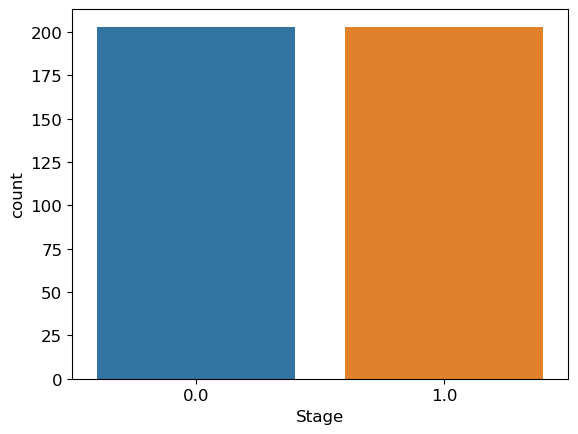

In [544]:
sns.countplot(y)

## EDA

In [3]:
#Check duplicate
len(pd.unique(cir_df["ID"])) == len(cir_df.index)

True

In [7]:
cir_df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

## Model

### Spliting Data

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [574]:
# scaling for assumption sensitive models
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

### Naive Bayes Model

We first use the Naive Bayes model which comes from the Bayes' Theorem, to predict the binary outcome of whether a patient has liver cirrhosis given the data. 

In [575]:
# training the Naive Bayes model on the training set
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

# predicting the test set results
nb_pred = NBclassifier.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, nb_pred)))

Model accuracy score: 0.6829


The default fitted model has accuracy of 68.29%, which is ok. Now fit another Naive Bayes model by applying tuning parameters.

In [576]:
# set parameters
nb_par = {'var_smoothing': (0,1e-9,1e-7, 1e-5, 1e-3), }

# with GridSearch
grid_search_gnb = GridSearchCV(
    estimator=NBclassifier,
    param_grid=nb_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
nbcv=grid_search_gnb.fit(X_train, y_train)
nbcv_pred =nbcv.predict(X_test)
nb_cm = confusion_matrix(nbcv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, nbcv_pred)))

Model accuracy score: 0.6829


The tuned model still has the same accuracy. We will use the tuned model to do further analysis.

#### Check for overfitting and underfitting

In [549]:
print('Training set score: {:.4f}'.format(nbcv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(nbcv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7346
Test set score: 0.6829


The training set accuracy score is 0.7346, while the test set accuracy is 0.6829, the two results differs in which the training set has obvious higher accuracy, so there is a sign of overfitting.

#### Confusion matrix

<Axes: >

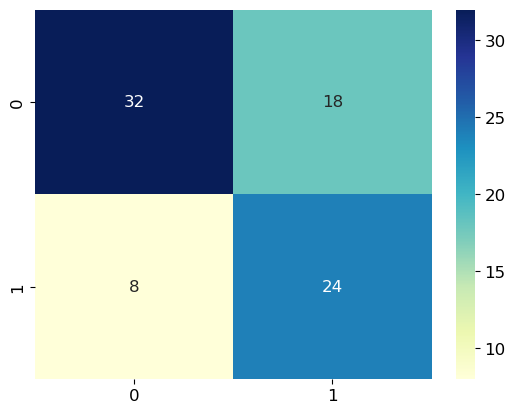

In [550]:
sns.heatmap(nb_cm, annot = True, cmap='YlGnBu')

#### Null accuracy
Null accuracy is the accuracy that could be achieved by always predicting the most frequent class. By comparing with the null accuracy, we could further access our model accuracy.

In [551]:
y_test.value_counts()

1.0    42
0.0    40
Name: Stage, dtype: int64

In [552]:
null_accuracy = 42/(42+40)

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5122


The null accuracy is 0.5122, while our Naive Bayes model accuracy score is 0.6829. Thus we conclude that our model performs good in predicting the class label, in this case, the sign of liver cirrhosis.

In [432]:
from sklearn.metrics import classification_report

print(f"Classification Report of Naive Bayes Classifier : \n {classification_report(y_test, nbcv_pred)}")

Classification Report of Naive Bayes Classifier : 
               precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        37
         1.0       0.81      0.50      0.62        26

    accuracy                           0.75        63
   macro avg       0.77      0.71      0.71        63
weighted avg       0.76      0.75      0.73        63



#### ROC curve and AUC
ROC curve shows the overall model performance by evaluating the true positive rate (TPR) against the false positive rate (FPR) at various threshold levels.

ROC AUC is used to evaluate performance between classifiers.

We will generate both to see how well the classifier model performs.

In [553]:
# predicted probabilities for class 1
nb_pred1 = nbcv.best_estimator_.predict_proba(X_test)[:, 1]

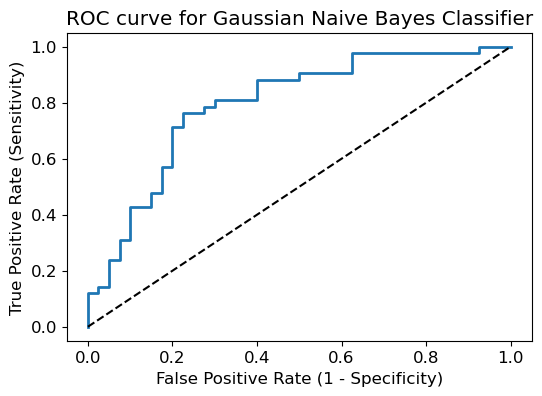

In [554]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [555]:
ROC_AUC = roc_auc_score(y_test, nb_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7935


The Naive Bayes model has AUC score of 0.7935, which is relatively high, so the model indeed performs well.

Now we will try other classification methods for model comparison and selection.

### Linear Discriminant Analysis

In [577]:
# training the LDA model on training set
lmodel = LinearDiscriminantAnalysis()
lda = lmodel.fit(X_train, y_train)

# predicting the test set results
lda_pred = lda.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, lda_pred)))

Model accuracy score: 0.7683


The default fitted model has accuracy of 76.83%, which is good and better than the Naive Bayes model. Now fit another LDA model by applying the tuning parameters for grid search.

In [557]:
# initiate model and parameters for gridsearch
lda2 = LinearDiscriminantAnalysis(shrinkage='auto')
lda_par = {
    'solver': ('lsqr','eigen'),
    'n_components': (1,2,1),
                   }
# with GridSearch
grid_search_lda = GridSearchCV(
    estimator=lda2,
    param_grid=lda_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
ldacv=grid_search_lda.fit(X_train, y_train)
ldacv_pred =ldacv.predict(X_test)
lda_cm = confusion_matrix(ldacv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ldacv_pred)))

Model accuracy score: 0.7805


/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Landi/miniconda3/envs/ML-env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py", line 608, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn(some_fits_failed_messag

After tuning, the model accuracy score increases to 0.7805, so we will use this model to further analyze performance.

#### Check for overfitting and underfitting

In [578]:
print('Training set score: {:.4f}'.format(ldacv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ldacv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7809
Test set score: 0.7805


The training set accuracy is 0.7809, while the test set accuracy is 0.7805. The two scores are similar so there is no sign of overfitting.

#### Confusion matrix

<Axes: >

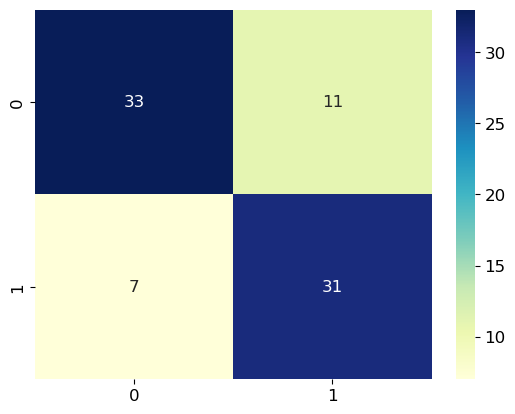

In [559]:
sns.heatmap(lda_cm, annot=True, cmap='YlGnBu')

In [560]:
print(f"Classification Report of Linear Discriminant Analysis : \n {classification_report(y_test, ldacv_pred)}")

Classification Report of Linear Discriminant Analysis : 
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.79        40
         1.0       0.82      0.74      0.78        42

    accuracy                           0.78        82
   macro avg       0.78      0.78      0.78        82
weighted avg       0.78      0.78      0.78        82



#### ROC curve and AUC

In [561]:
# predicted probabilities for class 1
lda_pred1 = ldacv.best_estimator_.predict_proba(X_test)[:, 1]

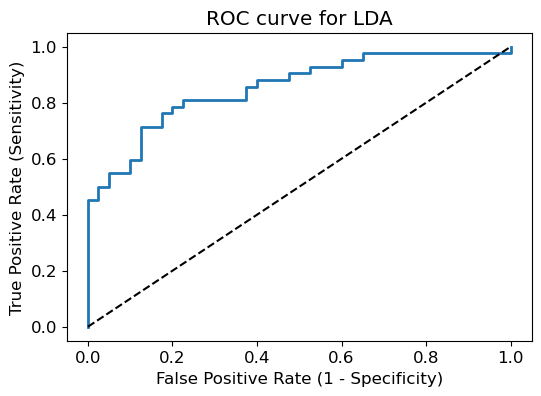

In [562]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lda_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for LDA')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [563]:
ROC_AUC = roc_auc_score(y_test, lda_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8536


The Linear Discriminant Analysis model has AUC of 0.8536, which is close to 1 and much higher than the Naive Bayes model, so this model performs even better than the Naive Bayes model.

### Quadratic Discriminant Analysis

In [564]:
# training the QDA model on training set
qmodel = QuadraticDiscriminantAnalysis()
qda = qmodel.fit(X_train, y_train)

# predicting the test results
qda_pred = qda.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, qda_pred)))

Model accuracy score: 0.7073


The default fitted model has accuracy of 70.73%, which is better than the Naive Bayes model, but still not as good as the LDA model. 

Now fit another QDA model by applying the tuning parameters for grid search.

In [565]:
# initiate model and parameters for gridsearch
qda2 = QuadraticDiscriminantAnalysis()
qda_par = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
grid_search_qda = GridSearchCV(
    estimator=qda2,
    param_grid=qda_par,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
qdacv=grid_search_qda.fit(X_train, y_train)
qdacv_pred =qdacv.predict(X_test)
qda_cm = confusion_matrix(qdacv_pred, y_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, qdacv_pred)))

Model accuracy score: 0.7439


After tuning, the model accuracy score increases to 0.7439, but still not as good as the LDA model. We will use this tuned model for further analysis. 

#### Check for overfitting and underfitting

In [579]:
print('Training set score: {:.4f}'.format(qdacv.best_estimator_.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(qdacv.best_estimator_.score(X_test, y_test)))

Training set score: 0.7901
Test set score: 0.7439


The training set accuracy score is 0.7901, while the test set accuracy is 0.7439, the two results differs in which the training set has obvious higher accuracy, so there is a sign of overfitting.

#### Confusion matrix

<Axes: >

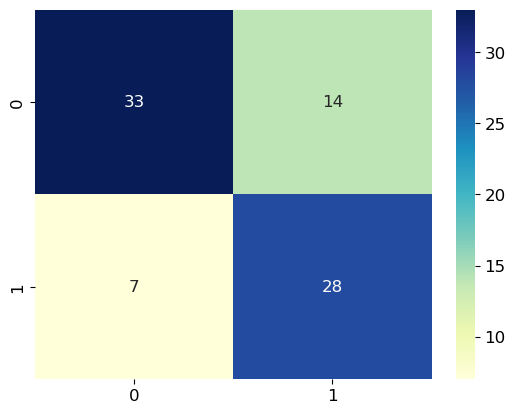

In [580]:
sns.heatmap(qda_cm, annot=True, cmap='YlGnBu')

#### ROC curve and AUC

In [569]:
# predicted probabilities for class 1
qda_pred1 = qdacv.best_estimator_.predict_proba(X_test)[:, 1]

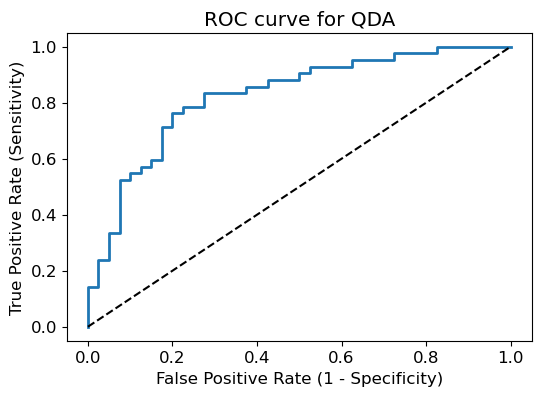

In [570]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, qda_pred1, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for QDA')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [571]:
# get AUC
ROC_AUC = roc_auc_score(y_test, qda_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8256


The Quadratic Discriminant Analysis model has AUC of 0.8256, which is close to 1, but lower than the AUC of LDA model, so this model performance ranks between the Naive Bayes model and the LDA model.

### Proportional Odds Model

In [9]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
#Or use R

In [18]:
cir_df["Stage"] = cir_df["Stage"].astype("category")

### Multilayer Perceptron Neural Network

In [ ]:
#Need one-hot encoding for Endema

$N_h = \frac{N_s}{\alpha  (N_i+N_o)}$

### XGBoost

## Performance Evaluation